In [2]:
!pip install fastbook

     ------------------------------------- 719.8/719.8 kB 15.1 MB/s eta 0:00:00
     ---------------------------------------- 47.3/47.3 kB ? eta 0:00:00
     ------------------------------------- 503.6/503.6 kB 10.5 MB/s eta 0:00:00
     -------------------------------------- 124.1/124.1 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 16.6 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 16.6 MB/s eta 0:00:00
     ------------------------------------- 246.9/246.9 kB 14.8 MB/s eta 0:00:00
     ---------------------------------------- 119.7/119.7 kB ? eta 0:00:00
     -------------------------------------- 143.5/143.5 kB 8.3 MB/s eta 0:00:00
     --------------------------------------- 14.3/14.3 MB 50.4 MB/s eta 0:00:00
     ------------------------------------- 388.2/388.2 kB 23.6 MB/s eta 0:00:00
     ---------------------------------------- 59.7/59.7 kB ? eta 0:00:00
     --------------------------------------- 12.3/12.3 MB 46.


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


importing neccessary libraries

In [2]:

#hide
from fastbook import *
from fastai.vision.widgets import *

defining categories and  its path

In [3]:
ship_types = 'noship','ship'
path = Path('Images')

In [4]:
fns = get_image_files(path)
fns


(#4564) [Path('Images/noship/0__20150718_184300_090b__-122.35324421973536_37.772113980272394.png'),Path('Images/noship/0__20150718_184300_090b__-122.38458613431831_37.763521076612484.png'),Path('Images/noship/0__20150718_184300_090b__-122.40477488428849_37.8071040053892.png'),Path('Images/noship/0__20150718_184300_090b__-122.42663861582857_37.80913223576201.png'),Path('Images/noship/0__20150720_184302_0906__-122.21893759782994_37.87172273326103.png'),Path('Images/noship/0__20150830_000650_0b07__-122.37967271362145_37.76049394246638.png'),Path('Images/noship/0__20150830_000650_0b07__-122.40480193174041_37.757000251300894.png'),Path('Images/noship/0__20150830_000650_0b07__-122.42961510889906_37.781052845407665.png'),Path('Images/noship/0__20150830_000652_1_0b07__-122.27654713066907_37.77410158935401.png'),Path('Images/noship/0__20150830_000652_1_0b07__-122.32492556715802_37.720904774415736.png'),Path('Images/noship/0__20160622_170157_0c64__-122.34466653421043_37.78296341833453.png'),Path

In [5]:

failed = verify_images(fns)
failed

(#0) []

creating the datablock , image as input and category as output

In [6]:
Ships = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

loading datas

In [7]:
dls = Ships.dataloaders(path)


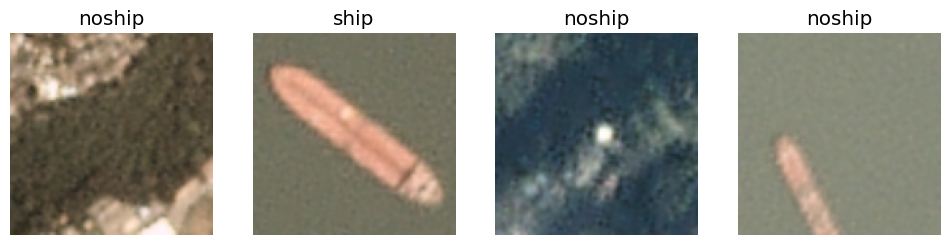

In [8]:

dls.valid.show_batch(max_n=4, nrows=1)

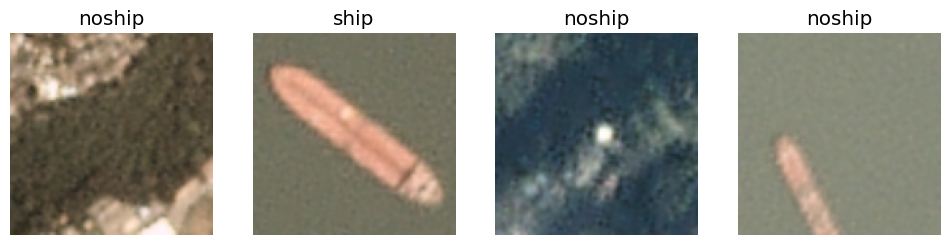

In [9]:

Ships = Ships.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = Ships.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

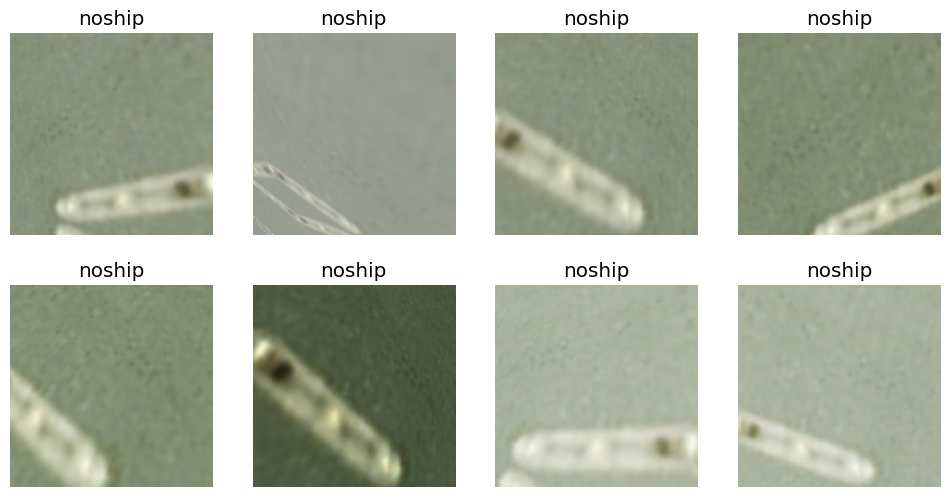

In [10]:
Ships =  Ships.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls =  Ships.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

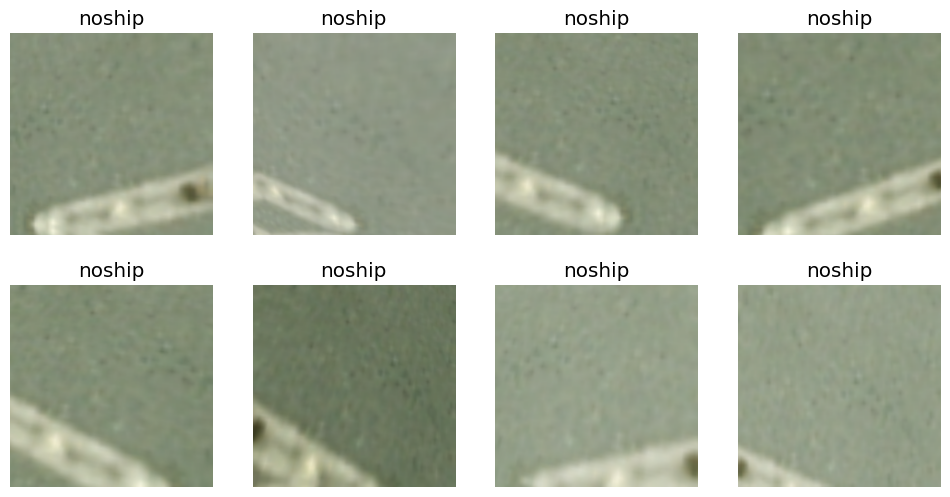

In [11]:

Ships = Ships.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = Ships.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

training the model with vision learner

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.577554,0.257615,0.091009,01:45


epoch,train_loss,valid_loss,error_rate,time
0,0.249640,0.146537,0.051535,03:34
1,0.186062,0.059025,0.016447,02:30
2,0.129272,0.072976,0.020833,03:11
3,0.109030,0.058795,0.016447,03:23


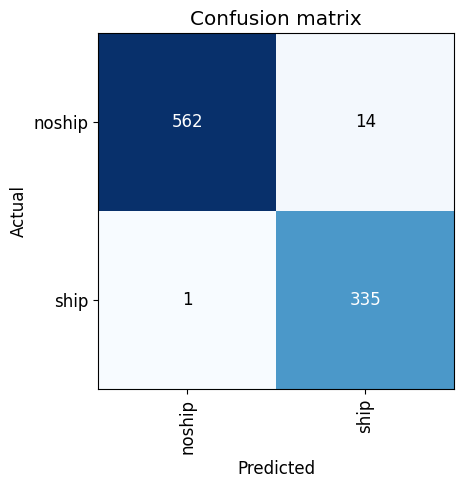

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()